In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(420)

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
# TODO
file_path = "heart.csv"
df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [3]:
feature_list = [feature for feature in df.columns]
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]

In [4]:
# TODO
# Checking for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
feature_list = [feature for feature in df.columns]
discrete_features=[feature for feature in feature_list if len(df[feature].unique())<25]
cont_features=[feature for feature in feature_list if len(df[feature].unique())>25]

In [6]:
print("Summary of discrete features:")
for feature in discrete_features:
    summary = df[feature].value_counts().sort_index().to_frame('Counts')
    summary['Percentage'] = (summary / summary.sum()) * 100
    print(summary)
    print("-"*50)

Summary of discrete features:
     Counts  Percentage
sex                    
0       312   30.439024
1       713   69.560976
--------------------------------------------------
    Counts  Percentage
cp                    
0      497   48.487805
1      167   16.292683
2      284   27.707317
3       77    7.512195
--------------------------------------------------
     Counts  Percentage
fbs                    
0       872   85.073171
1       153   14.926829
--------------------------------------------------
         Counts  Percentage
restecg                    
0           497   48.487805
1           513   50.048780
2            15    1.463415
--------------------------------------------------
       Counts  Percentage
exang                    
0         680   66.341463
1         345   33.658537
--------------------------------------------------
       Counts  Percentage
slope                    
0          74    7.219512
1         482   47.024390
2         469   45.756098
-----------

In [7]:
continuous_summary = df[cont_feature].describe()
print("Summary of continuous features:")
print(continuous_summary)

Summary of continuous features:
               age     trestbps        chol      thalach      oldpeak
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000
mean     54.434146   131.611707   246.00000   149.114146     1.071512
std       9.072290    17.516718    51.59251    23.005724     1.175053
min      29.000000    94.000000   126.00000    71.000000     0.000000
25%      48.000000   120.000000   211.00000   132.000000     0.000000
50%      56.000000   130.000000   240.00000   152.000000     0.800000
75%      61.000000   140.000000   275.00000   166.000000     1.800000
max      77.000000   200.000000   564.00000   202.000000     6.200000


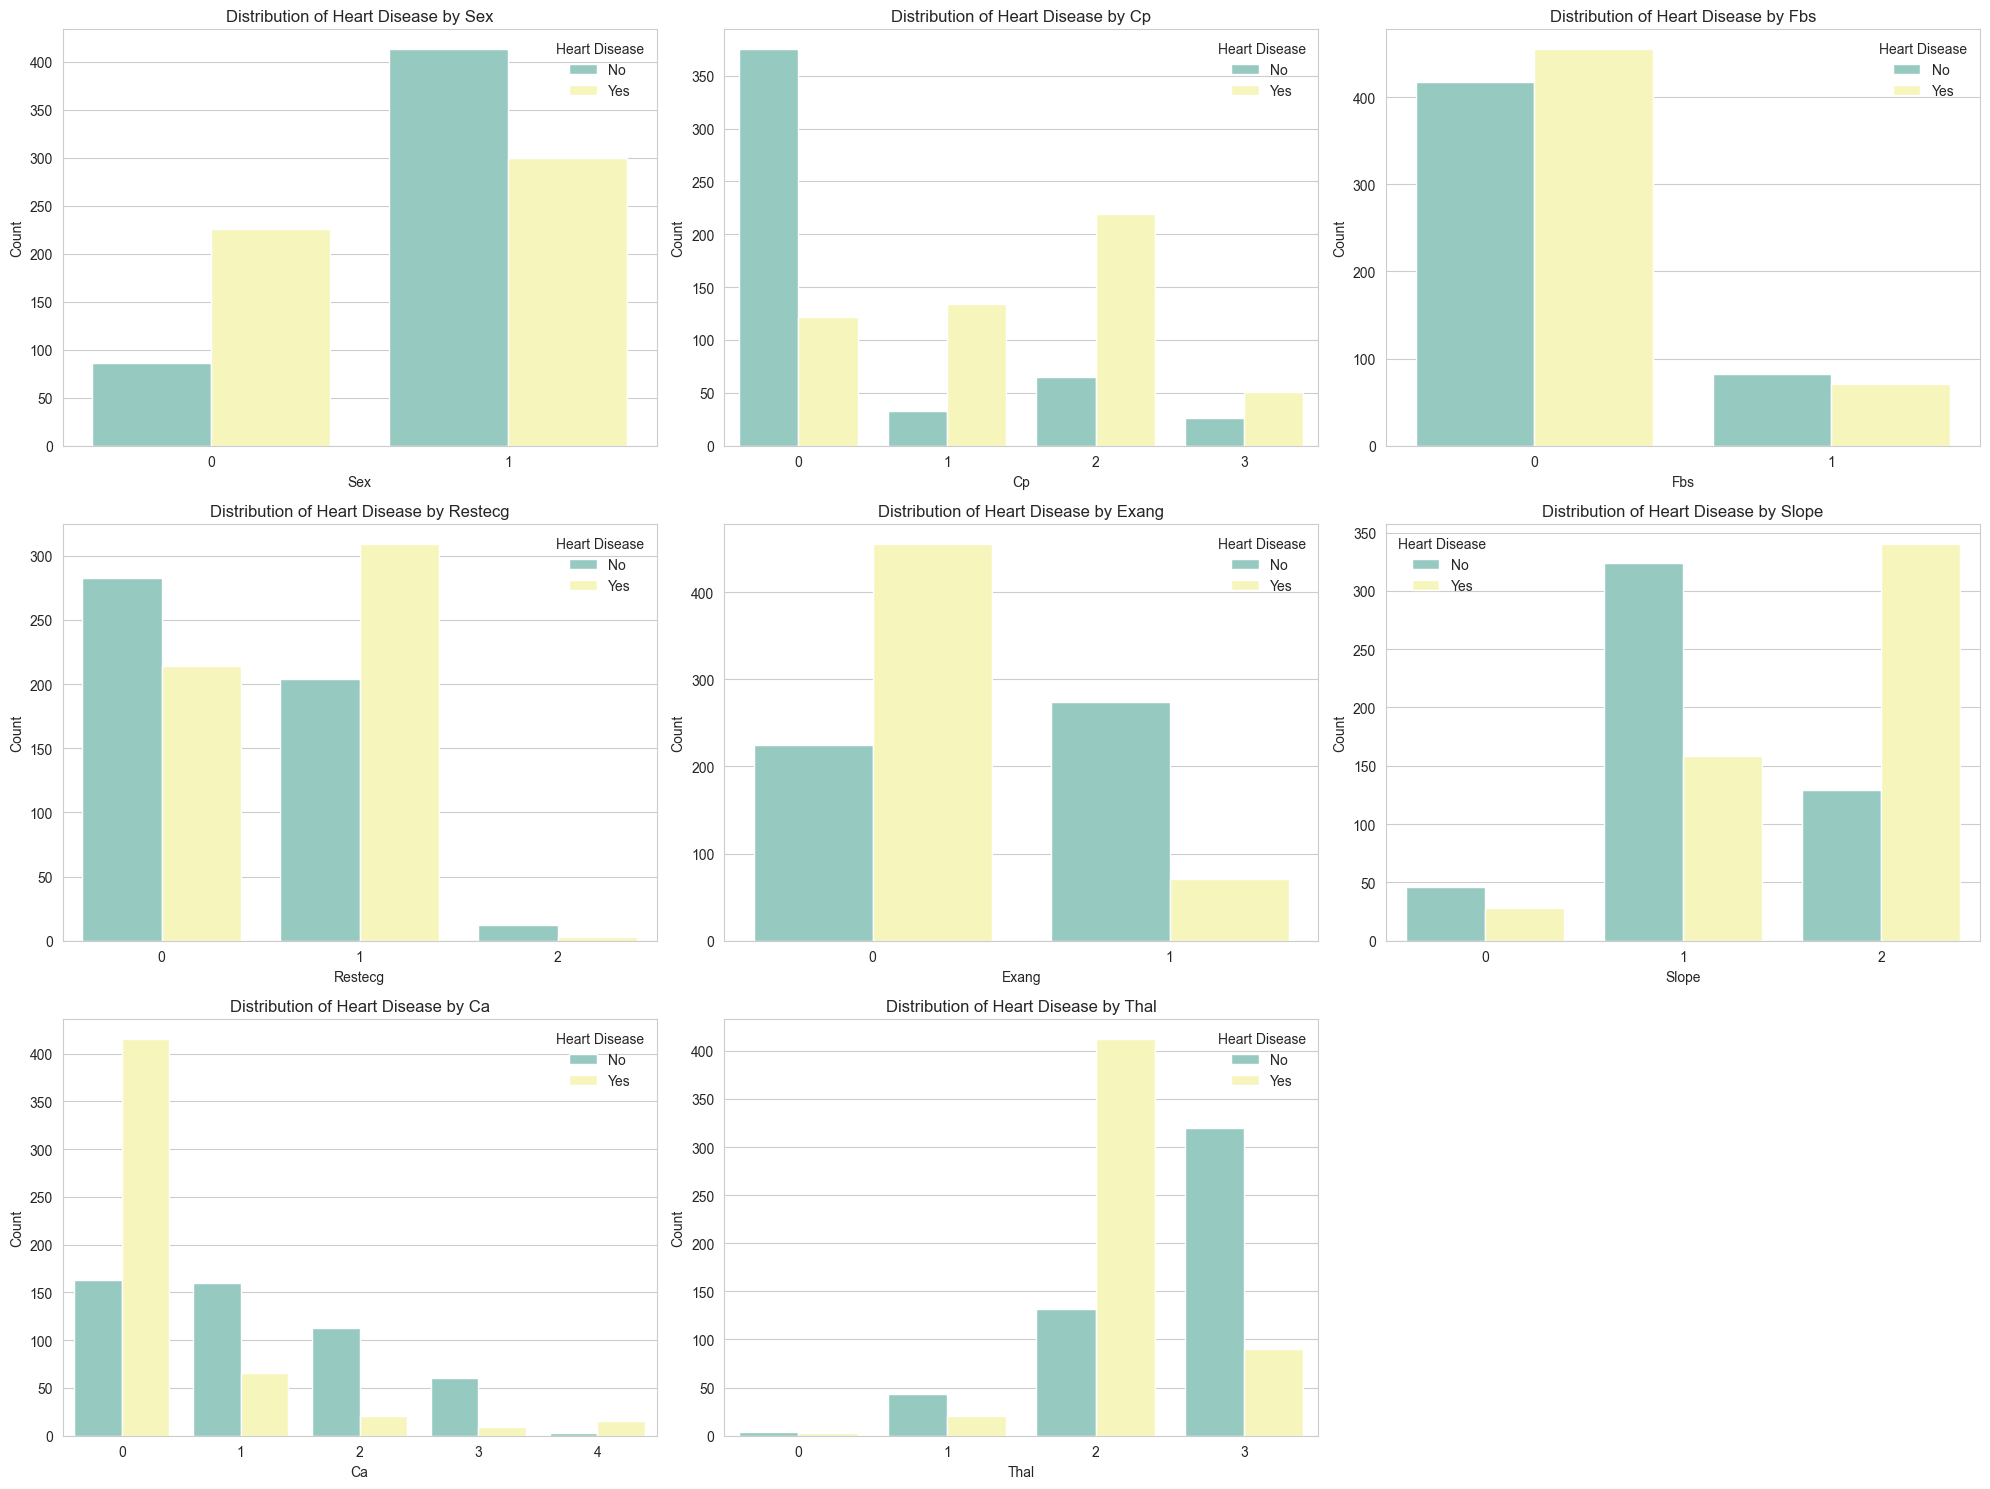

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))

for index, feature in enumerate(discrete_features[:-1], 1):
    plt.subplot(3, 3, index)
    sns.countplot(x=feature, hue='target', data=df, palette='Set3', hue_order=[0, 1])
    plt.title(f'Distribution of Heart Disease by {feature.title()}')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'], frameon=False)
    plt.xlabel(feature.title())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sina/miniforge3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

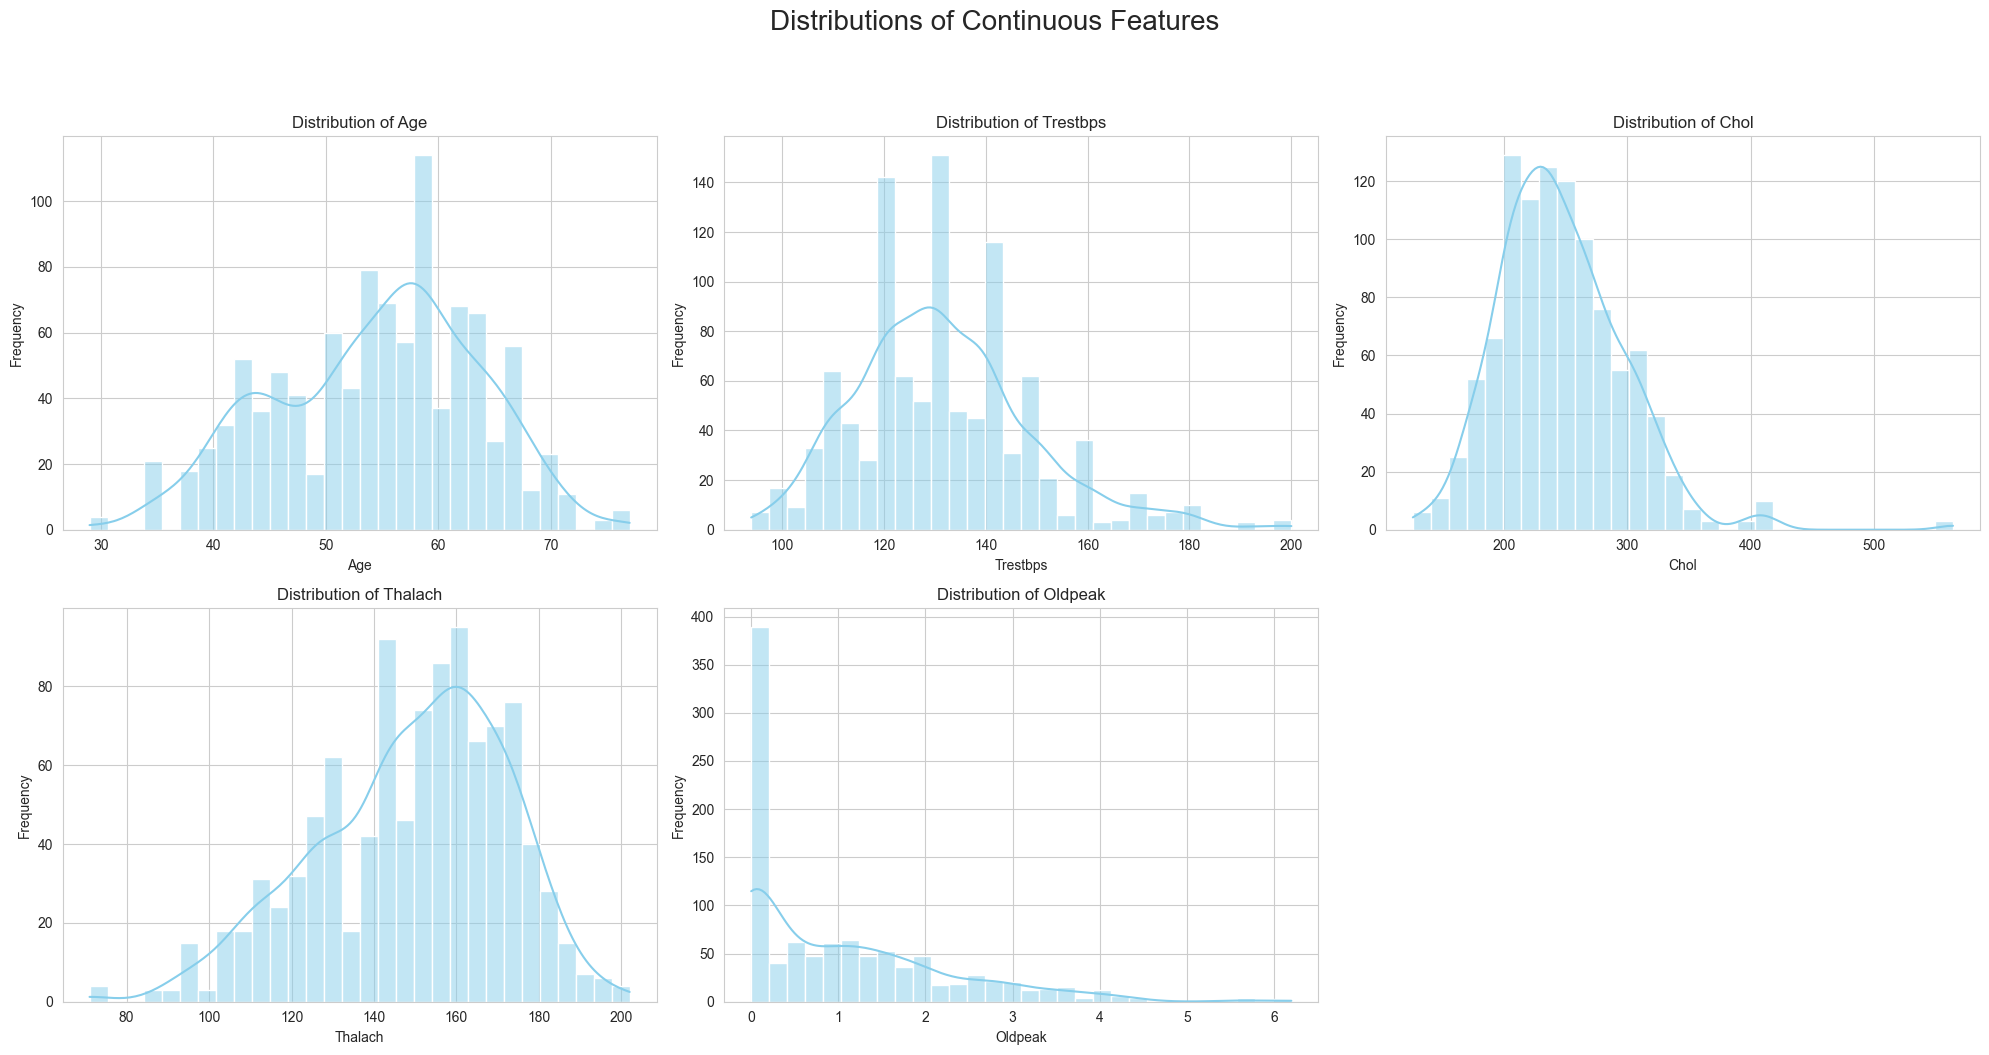

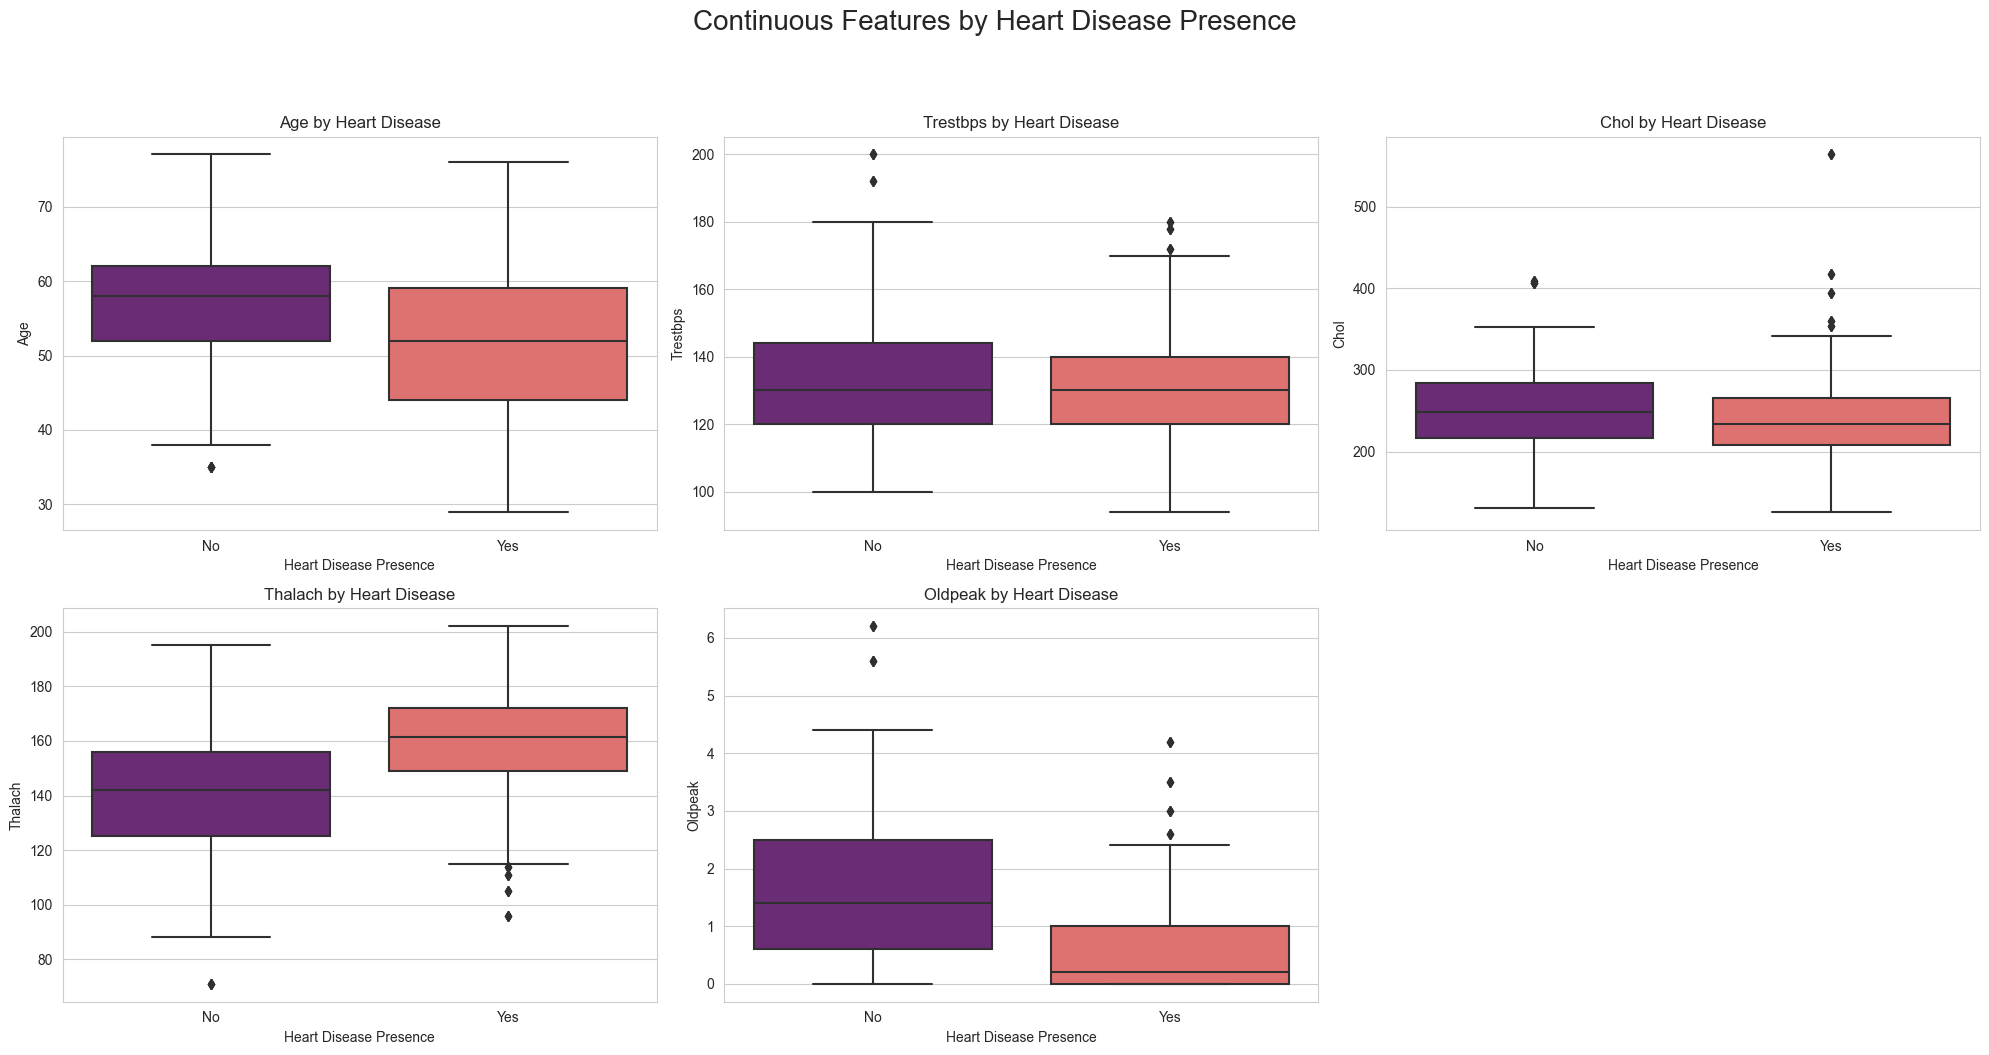

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.suptitle('Distributions of Continuous Features', fontsize=20, y=1.05)

for index, feature in enumerate(cont_features, 1):
    plt.subplot(2, 3, index)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature.title()}')
    plt.xlabel(feature.title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
plt.suptitle('Continuous Features by Heart Disease Presence', fontsize=20, y=1.05)

for index, feature in enumerate(cont_features, 1):
    plt.subplot(2, 3, index)
    sns.boxplot(x='target', y=feature, data=df, palette='magma')
    plt.title(f'{feature.title()} by Heart Disease')
    plt.xlabel('Heart Disease Presence')
    plt.ylabel(feature.title())
    plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

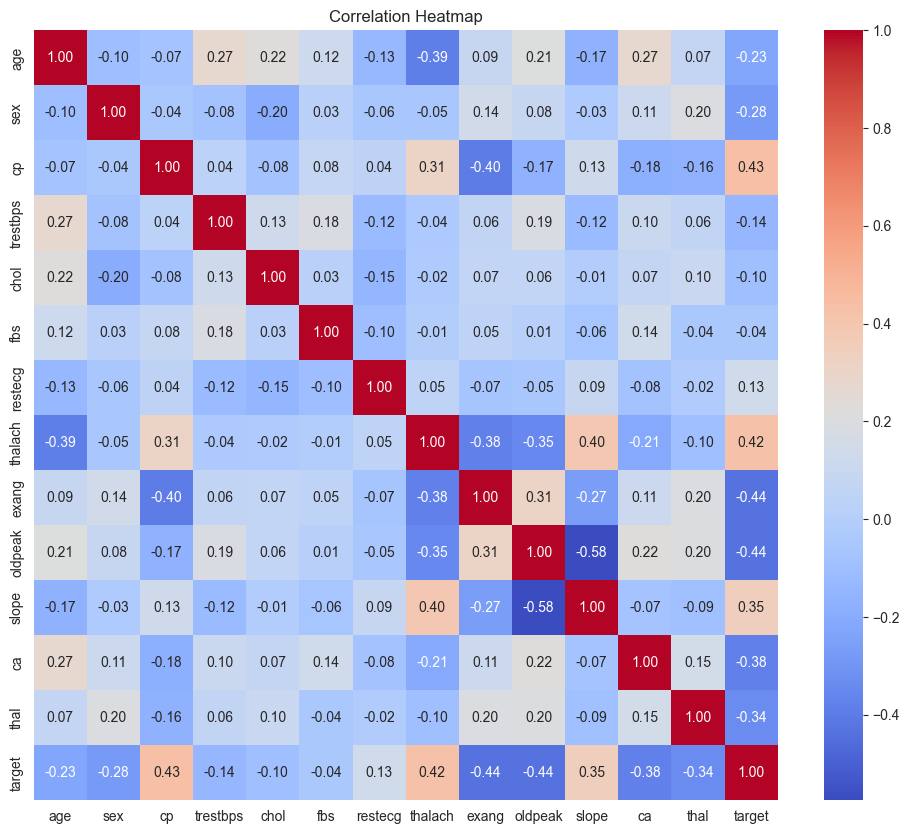

In [10]:
# Visualizing the correlation between the features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [11]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [12]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [13]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''
    w = np.zeros(len(X[0]))
    LEARNING_RATE = 1e-2
    EPOCHS = 200

    for t in range(EPOCHS):
        random_permutaion = np.random.permutation(len(X))
        for i in random_permutaion:
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + LEARNING_RATE*X[i]*Y[i]
                
    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [14]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    # Your Implementation here
    w = np.zeros(len(X[0]))
    errors = []
    LEARNING_RATE = 1e-3
    EPOCHS = 200

    for t in range(EPOCHS):
        total_error = 0
        random_permutaion = np.random.permutation(len(X))
        for i in random_permutaion:
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error += np.dot(X[i], w)*Y[i]
                w = w + LEARNING_RATE*X[i]*Y[i]
        errors.append(total_error*-1)
    
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    return w

In [15]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [16]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = -1*np.ones((X.shape[0], 1))

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

# replace 0 with -1 in y
y = np.where(y == 0, -1, y)

In [17]:
# TODO: Split the data to train and test with a 0.2 ratio

random_permutaion = np.random.permutation(len(X))
X = X[random_permutaion]
y = y[random_permutaion]

X_train, X_val, y_train, y_val = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

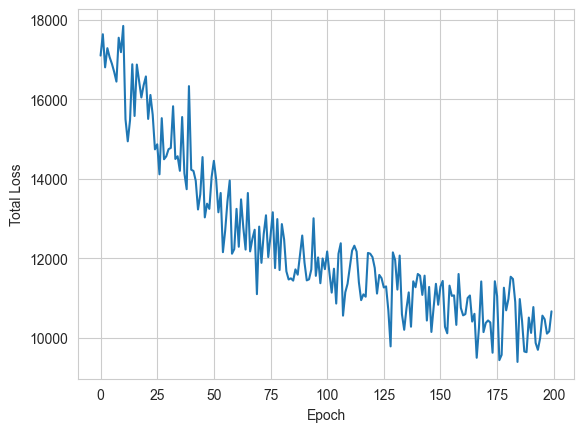

In [18]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [19]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation
    return np.mean(y_true == y_pred)

Get the accuracy of your model using the function you implemented.

In [20]:
# TODO
predictions = np.array([1 if np.dot(w, x) > 0 else -1 for x in X_val])

print(accuracy_score(y_val, predictions))

0.6829268292682927


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [21]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_dict = {label: i for i, label in enumerate(labels)}
    
    # TODO: Populate the confusion matrix
    for i in range(len(actual)):
        matrix[label_dict[actual[i]]][label_dict[predicted[i]]] += 1
                
    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Now plot the confusion matrix for your model:

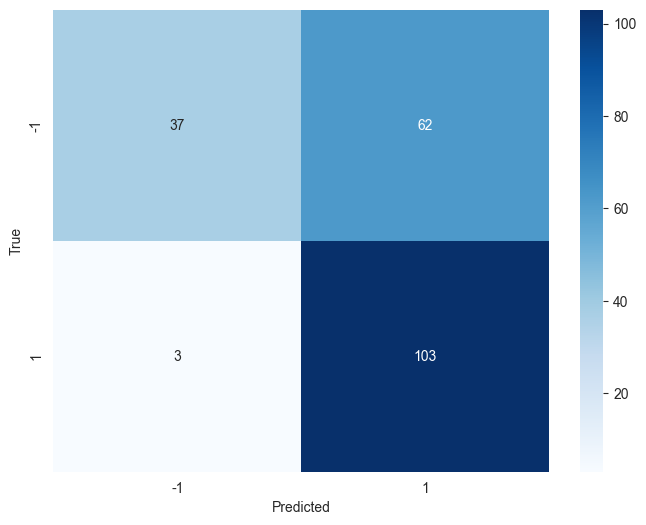

In [23]:
# TODO
labels = [-1, 1]
cm = confusion_matrix(y_val, predictions, labels)

plot_confusion_matrix(cm, labels)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [24]:
def recall_score(cm):
  #TODO: return the recall score
  return cm[1][1]/(cm[1][0]+cm[1][1])

print(recall_score(cm))

0.9716981132075472


In [25]:
def precision_score(cm):
  #TODO: return the precision score
  return cm[1][1]/(cm[0][1]+cm[1][1])

print(precision_score(cm))

0.6242424242424243


In [26]:
def f1_score(cm):
  #TODO: return the f1 score
  precision = precision_score(cm)
  recall = recall_score(cm)
  return 2*(precision*recall)/(precision+recall)
  
print(f1_score(cm))

0.7601476014760149


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [27]:
class MixedDataNB:
    def __init__(self, alpha=1):
        # Your Implementation here
        self.cont_col_indices = []
        self.disc_col_indices = []
        self.alpha = alpha

    def fit(self, X, y):
        '''
        TODO: Train moodel using train data

        :param X: data samples as a numpy array
        :param Y: data labels as a numpy array
        '''
        # Your Implementation here

        # Find the indices of continuous and discrete columns
        for i in range(X.shape[1]):
            if np.unique(X[:,i]).shape[0] > 25:
                self.cont_col_indices.append(i)
            else:
                self.disc_col_indices.append(i)

        # Create a mapping for the classes
        self.class_mapping = {}
        self.unique_classes = []
        unique_classes = np.unique(y)
        for i in range(len(unique_classes)):
            self.class_mapping[i] = unique_classes[i]
            self.unique_classes.append(i)

        # Calculate the mean and standard deviation for continuous columns
        self.cont_mean = {i: {} for i in self.cont_col_indices}
        self.cont_std = {i: {} for i in self.cont_col_indices}
        for i in self.cont_col_indices:
            for j in self.unique_classes:
                self.cont_mean[i][j] = np.mean(X[y == j][:,i])
                self.cont_std[i][j] = np.std(X[y == j][:,i])
        
        # Calculate the probability for discrete columns
        self.disc_prob = {i: {} for i in self.disc_col_indices}
        for i in self.disc_col_indices:
            for j in self.unique_classes:
                self.disc_prob[i][j] = {}

        for i in self.disc_col_indices:
            for j in self.unique_classes:
                for k in np.unique(X[:,i]):
                    self.disc_prob[i][j][k] = (np.sum(X[y == j][:,i] == k) + self.alpha) / (np.sum(y == j) + self.alpha*len(np.unique(X[:,i])))
                
        # Calculate the prior
        self.prior = {i: np.sum(y == self.class_mapping[i])/len(y) for i in self.unique_classes}

    def predict(self, X):
        '''
        TODO: Predict test data labels

        :param X: data samples as a numpy array
        :return: labels vector as a numpy array
        '''
        # Your Implementation here
        class_probs = np.zeros((X.shape[0], len(self.unique_classes)))

        # add prior
        for r in range(X.shape[0]):
            for j in self.unique_classes:
                class_probs[r,j] += np.log(self.prior[j])
        
        # add continuous
        for i in self.cont_col_indices:
            for r in range(X.shape[0]):
                for j in self.unique_classes:
                    prob = np.log((1/(np.sqrt(2*np.pi)*self.cont_std[i][j])))
                    prob += -(((X[r,i]-self.cont_mean[i][j])**2) / (2*(self.cont_std[i][j]**2)))
                    class_probs[r, j] += prob

        # add discrete
        for i in self.disc_col_indices:        
            for r in range(X.shape[0]):
                for j in self.unique_classes:
                    if X[r,i] in self.disc_prob[i][j]:
                        class_probs[r,j] += np.log(self.disc_prob[i][j][X[r,i]])
                    else:
                        class_probs[r,j] += np.log(self.alpha / (np.sum(y == j) + self.alpha*len(self.disc_prob[i][j])))

        predictions = []
        for i in range(X.shape[0]):
            predictions.append(self.class_mapping[self.unique_classes[np.argmax(class_probs[i])]])
            
        return predictions

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [28]:
# TODO
df = pd.read_csv(file_path)

X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df.loc[:, "target"]

X = X.to_numpy()
y = y.to_numpy()


random_permutaion = np.random.permutation(len(X))
X = X[random_permutaion]
y = y[random_permutaion]

X_train, X_val, y_train, y_val = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

### Model training

In [29]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

### Make predictions

In [30]:
# TODO
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [31]:
print(accuracy_score(y_val, predictions))

0.8585365853658536


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

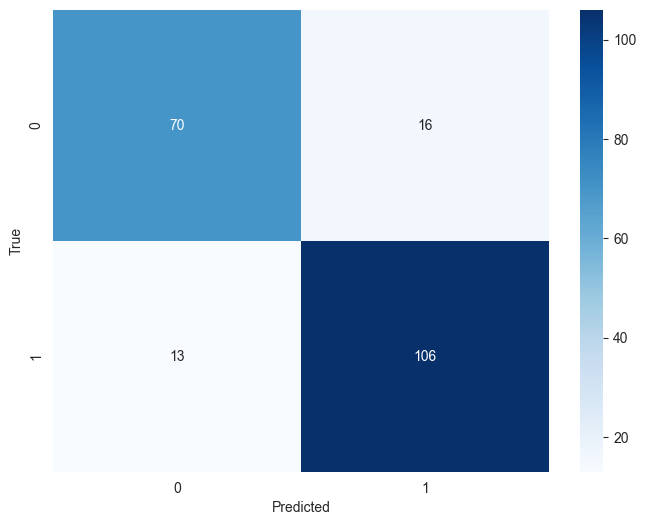

In [32]:
# TODO
labels = [0, 1]
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [33]:
print(recall_score(cm))

0.8907563025210085


In [34]:
print(precision_score(cm))

0.8688524590163934


In [35]:
print(f1_score(cm))

0.8796680497925311


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


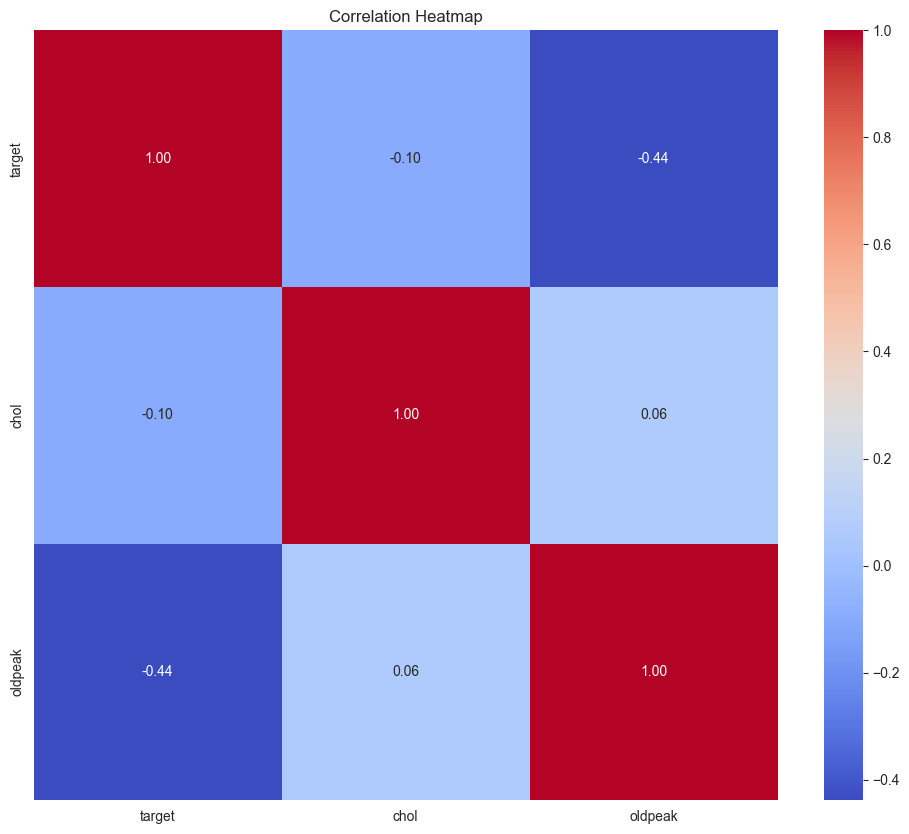

In [36]:
# TODO
df = pd.read_csv(file_path)
plt.figure(figsize=(12, 10))
sns.heatmap(df[['target', 'chol', 'oldpeak']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

`oldpeak` has a stronger correlation with the `target` and it should be more important for predicting `target` than the `chol` variable

In [37]:
# TODO
df = pd.read_csv(file_path)

# Removing Chol column
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'thalach', 'oldpeak']]
y = df.loc[:, "target"]

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [38]:
# TODO
df = pd.read_csv(file_path)

# Removing Chol column
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'thalach', 'oldpeak']]
y = df.loc[:, "target"]

X = X.to_numpy()
y = y.to_numpy()


random_permutaion = np.random.permutation(len(X))
X = X[random_permutaion]
y = y[random_permutaion]

X_train, X_val, y_train, y_val = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

In [39]:
model = MixedDataNB()
model.fit(X_train, y_train)

predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
labels = [0, 1]
cm = confusion_matrix(y_val, predictions, labels)
recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)


Accuracy: 0.8390243902439024
Recall: 0.8482142857142857
Precision: 0.8558558558558559
F1: 0.852017937219731


Remove oldpeak and test model

In [40]:
# TODO
df = pd.read_csv(file_path)

# Removing Chol column
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach']]
y = df.loc[:, "target"]

X = X.to_numpy()
y = y.to_numpy()


random_permutaion = np.random.permutation(len(X))
X = X[random_permutaion]
y = y[random_permutaion]

X_train, X_val, y_train, y_val = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

In [41]:
model = MixedDataNB()
model.fit(X_train, y_train)

predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
labels = [0, 1]
cm = confusion_matrix(y_val, predictions, labels)
recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

Accuracy: 0.8195121951219512
Recall: 0.826530612244898
Precision: 0.801980198019802
F1: 0.814070351758794


Comparison

**Answer:**



As we can see from the heatmap, `oldpeak` has a stronger correlation with the `target` and it should be more important for predicting `target` than the `chol` variable. 

When we remove each one and test our model each time, we see that `oldpeak` is indeed more crucial for predicting target and when removed, the performance of our model is worse than when the `chol` variable is removed.

<br>

| Metric     | without `oldpeak` | without `chol` | all the data
|------------|------------|------------|------------|
| Recall     | 82.6%        | 84.8%        | 89.0%            |
| Precision  | 80.1%        | 85.5%        | 86.8%            |
| Accuracy   | 81.9%        | 83.9%        | 85.8%            |
| F1-Score   | 81.4%        | 85.2%        | 87.9%            |


# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:

The Naive Bayes model outperformed the Perceptron, the better performance of the Naive Bayes model may stem from its ability in handling the probabilistic relationships within the data, despite the weak assumptions of feature independence. Considering the features are not highly correlated (as we saw in the exploratory data analysis part), this my be the reason our Naive Bayes model performed relatively well. When the data is linearly separable, Perceptron performs well and when it's not, it's performance drops, which apparantly is the case here.

| Metric     | Perceptron | Naive Bayes
|------------|------------|------------|
| Recall     | 97.1%          | 89.0%            |
| Precision  | 62.4%          | 86.8%            |
| Accuracy   | 68.2%          | 85.8%            |
| F1-Score   | 76.0%          | 87.9%            |


# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [42]:
df = pd.read_csv("Imbalanced_Datasets/1.csv")

### Find the distribution


Find the number of samples from each target label.

In [43]:
# TODO
# Find the number of samples from each target label
print(df['target'].value_counts())

target
0    499
1    226
Name: count, dtype: int64


### Split data

In [44]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach']]
y = df.loc[:, "target"]

X = X.to_numpy()
y = y.to_numpy()

random_permutaion = np.random.permutation(len(X))
X = X[random_permutaion]
y = y[random_permutaion]

X_train, X_val, y_train, y_val = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

### Train model and make predictions

In [45]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

predictions = model.predict(X_val)

### Plot confusion matrix

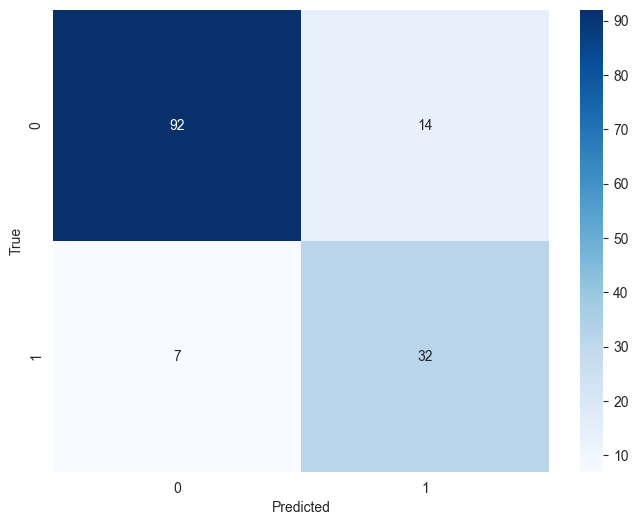

In [46]:
# TODO
# print the confusion matrix
labels = [0, 1]
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [47]:
# TODO
accuracy = accuracy_score(y_val, predictions)
recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

Accuracy: 0.8551724137931035
Recall: 0.8205128205128205
Precision: 0.6956521739130435
F1: 0.7529411764705882


## Second dataset

### Load data

In [48]:
df = pd.read_csv("Imbalanced_Datasets/2.csv")

### Find the distribution


Find the number of samples from each target label.

In [49]:
# TODO
print(df['target'].value_counts())

target
0    499
1    126
Name: count, dtype: int64


### Split data

In [50]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach']]
y = df.loc[:, "target"]

X = X.to_numpy()
y = y.to_numpy()

random_permutaion = np.random.permutation(len(X))
X = X[random_permutaion]
y = y[random_permutaion]

X_train, X_val, y_train, y_val = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

### Train model and make predictions

In [51]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

predictions = model.predict(X_val)

### Plot confusion matrix

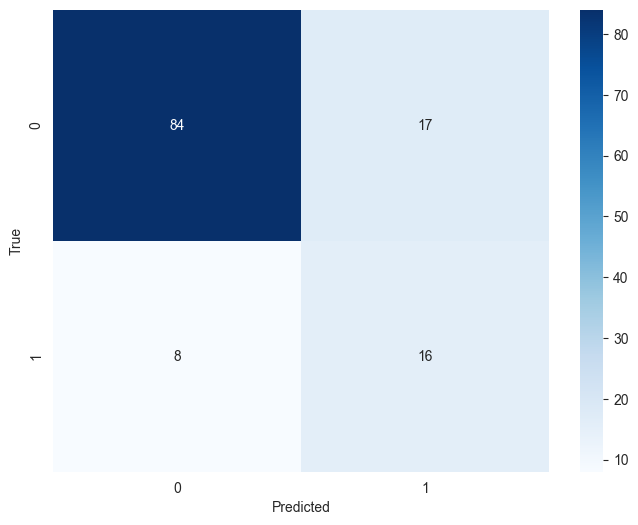

In [52]:
# TODO
labels = [0, 1]
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [53]:
# TODO
accuracy = accuracy_score(y_val, predictions)
recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

Accuracy: 0.8
Recall: 0.6666666666666666
Precision: 0.48484848484848486
F1: 0.5614035087719298


## Third dataset

### Load data

In [54]:
df = pd.read_csv("Imbalanced_Datasets/3.csv")

### Find the distribution


Find the number of samples from each target label.

In [55]:
# TODO
print(df['target'].value_counts())

target
0    499
1     26
Name: count, dtype: int64


### Split data

In [56]:
# TODO
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach']]
y = df.loc[:, "target"]

X = X.to_numpy()
y = y.to_numpy()

random_permutaion = np.random.permutation(len(X))
X = X[random_permutaion]
y = y[random_permutaion]

X_train, X_val, y_train, y_val = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

### Train model and make predictions

In [57]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

predictions = model.predict(X_val)

### Plot confusion matrix

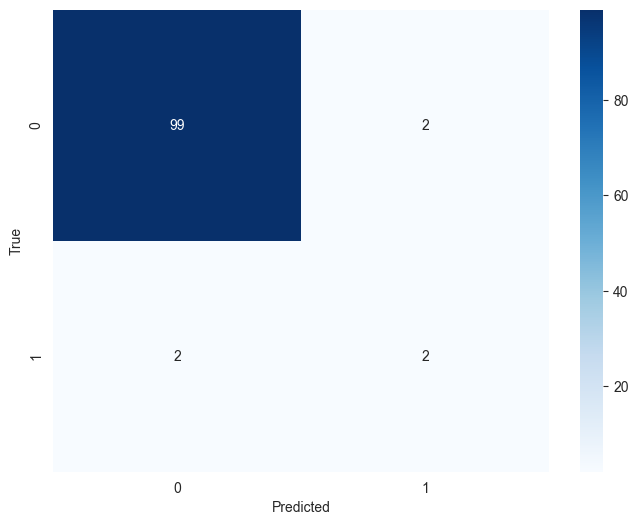

In [58]:
# TODO
labels = [0, 1]
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### Calculate metrics

In [59]:
# TODO
accuracy = accuracy_score(y_val, predictions)
recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

Accuracy: 0.9619047619047619
Recall: 0.5
Precision: 0.5
F1: 0.5


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**

As we can see above, for evaluating models in imbalanced datasets, the F1 score is often considered the most appropriate metric. It balances precision and recall, providing a single value that considers both false positives and false negatives.

Accuracy might not be appropriate for evaluating models in imbalanced datasets because it can be misleading when classes are unevenly distributed. In such datasets, a model could achieve high accuracy by simply predicting the majority class for all instances, without effectively capturing the patterns of the minority class. As a result, accuracy alone does not provide a complete picture of the model's performance, especially when the minority class is of interest.

For instance, consider a dataset with 90% of instances belonging to the majority class and only 10% to the minority class. A classifier that predicts all instances as the majority class would achieve 90% accuracy, but it would completely fail to detect the minority class.

Thus, in imbalanced datasets, it is essential to use evaluation metrics that consider both false positives and false negatives, such as F1 score, to assess the model's performance accurately.